In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pathlib import Path
from glob import glob

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [14]:
ROOT_PATH = Path('/content/drive/My Drive/university/projects/DL/Project/experiments/cifar/resnet18_150')
path_all_per = glob("/content/drive/My Drive/university/projects/DL/Project/experiments/cifar/resnet18_150/per_samples_results/p*")
path_all_conv = glob("/content/drive/My Drive/university/projects/DL/Project/experiments/cifar/resnet18_150/per_samples_results/c*")
DATA_FOLDER = ROOT_PATH/'per_samples_results/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Confusion Matrix


Confusion matrix, without normalization
[[953   2  11   4   2   2   3   2  17   4]
 [  2 959   0   0   0   1   0   0   3  35]
 [ 13   1 917  10  11  24  15   3   4   2]
 [  7   1  11 843  21  89   9   9   4   6]
 [  1   0   3  10 961  14   4   7   0   0]
 [  0   3   6  40  13 928   2   7   1   0]
 [  2   0   9  14   5   6 963   1   0   0]
 [  6   0   1   6   9  18   0 959   1   0]
 [ 16   5   1   1   0   1   3   1 963   9]
 [  6  14   0   1   1   0   0   1   7 970]]


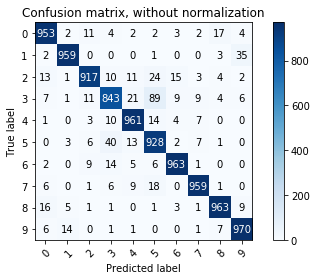

In [16]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


df1 = pd.read_csv(DATA_FOLDER/'per_sample_results_baseline_seed_0.csv')
df1['true_label'] = df1['true_label'].astype(int)
df1['predicted_label'] = df1['predicted_label'].astype(int)
# confusion_matrix(df['true_label'], df['predicted_label'])
plot_confusion_matrix(df1['true_label'] ,df1['predicted_label'], classes=np.arange(10),
                      title='Confusion matrix, without normalization')
plt.show() 

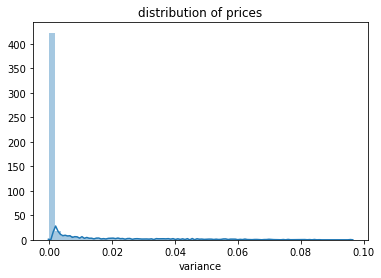

In [17]:
sns.distplot(df1['variance'])
plt.title('distribution of prices')
plt.show()

# Scatterplot

In [0]:
df1['round_p_true_label'] = df1['p_true_label'].round(2)
plot_data = df1.groupby('round_p_true_label').agg(mean_std=('variance', 'mean'),counts=('variance', 'size')).reset_index()

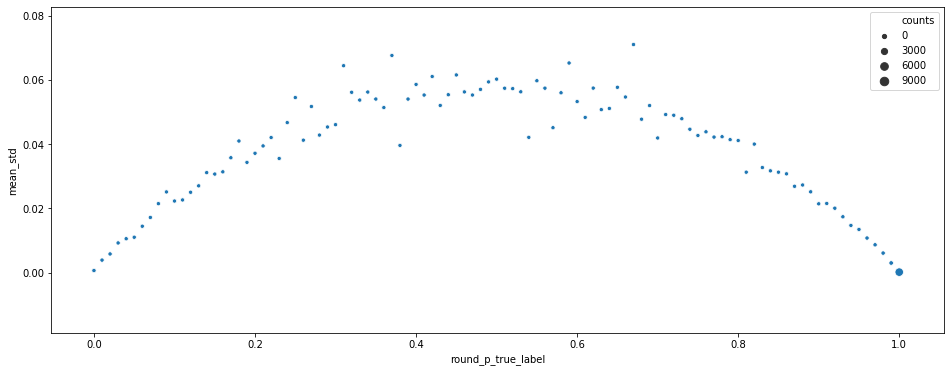

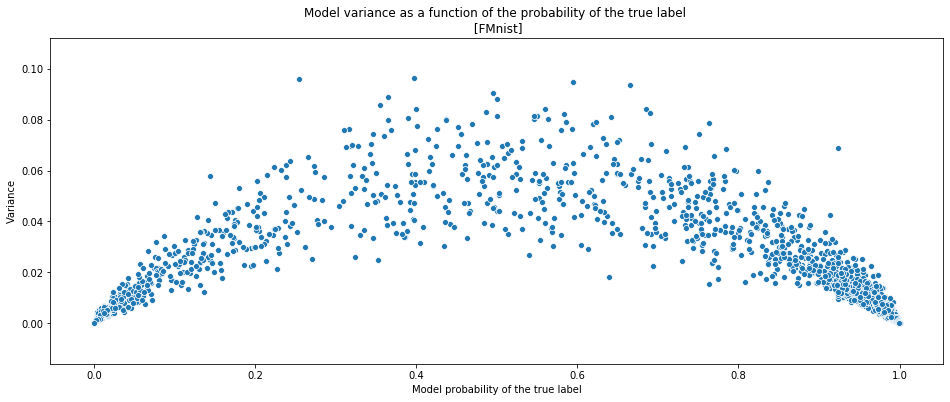

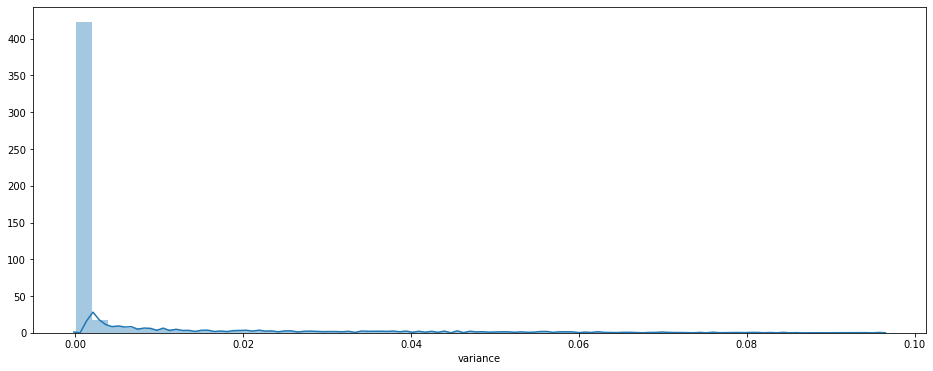

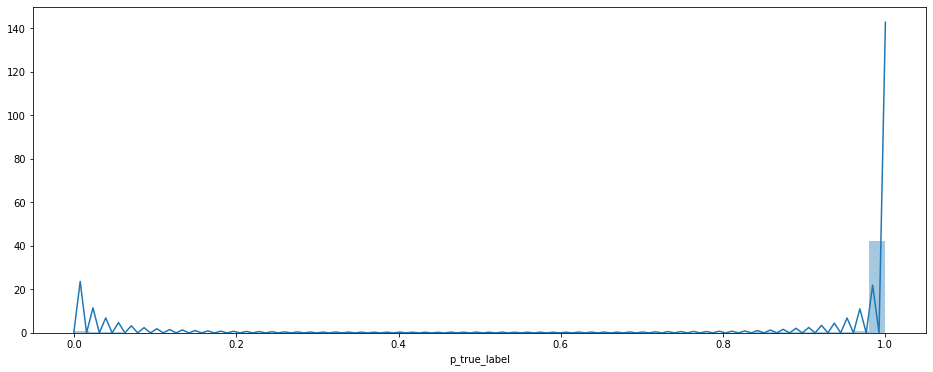

In [19]:
# means
plt.figure(figsize=(16, 6))
sns.scatterplot(x="round_p_true_label", y="mean_std",size = "counts",data=plot_data)
plt.show()

# all
plt.figure(figsize=(16, 6))
sns.scatterplot(x="p_true_label", y="variance",data=df1).set(xlabel = 'Model probability of the true label',ylabel = 'Variance', title = "Model variance as a function of the probability of the true label \n [FMnist]")
plt.savefig(ROOT_PATH / 'prediction variance as a function of p true label.png')
plt.show()

plt.figure(figsize=(16, 6))
sns.distplot(df1['variance'])
# plt.title('distribution of prices')
plt.show()

plt.figure(figsize=(16, 6))
sns.distplot(df1['p_true_label'])
# plt.title('distribution of prices')
plt.show()

In [20]:
# largest variance for confused labels
df1.nlargest(1000,'variance')['true_label'].value_counts()

3    214
2    137
5    126
0    111
4     81
7     74
6     70
1     68
8     61
9     58
Name: true_label, dtype: int64

# Results mean and std accuracy

In [0]:
file_paths = {i:[] for i in ['baseline','SGD-WPV', 'MCdropout','entropy']}
results =  {i:[] for i in ['baseline','SGD-WPV', 'MCdropout','entropy']}
paths = [Path(path) for path in path_all_conv]
for path in paths:
  file_paths[str(path.stem.split('_')[2])].append(path)

In [22]:
for key,path_list in file_paths.items():
  for i,path in enumerate(path_list):
    df = pd.read_csv(file_paths[key][i])
    total_rows = df.shape[0]
    results[key].append(float(df.iloc[total_rows-1].values[-1][7:-1]))

for key in results.keys():
  result = np.array(results[key])
  print(F"{key} mean : {np.mean(result)} , std : {np.std(result)}")

baseline mean : 0.8890799999999999 , std : 0.04160727820946716
SGD-WPV mean : 0.8801399999999999 , std : 0.05218404353823107
MCdropout mean : 0.78128 , std : 0.11454666123462524
entropy mean : 0.8584999999999999 , std : 0.08130215249303059


[]

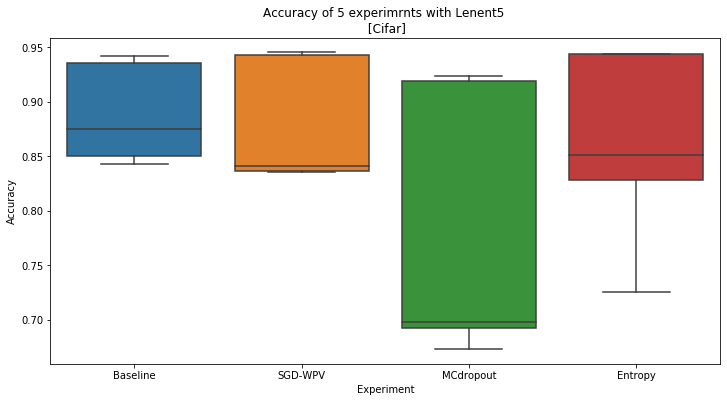

In [25]:
to_plot = pd.DataFrame(results)
to_plot.columns = ['Baseline','SGD-WPV', 'MCdropout','Entropy']
to_plot = to_plot.melt()
to_plot.columns = ['Experiment', 'Accuracy']
plt.figure(figsize=(12, 6))
sns.boxplot(x="Experiment", y="Accuracy", data=to_plot).set(title = "Accuracy of 5 experimrnts with Lenent5 \n [Cifar]")
plt.savefig(ROOT_PATH / 'Accuracy of 5 experimrnts with Resnet18.png')
plt.plot()

In [12]:
from scipy import stats
t_test = pd.DataFrame(results)
stats.ttest_ind(t_test['baseline'],t_test['SGD-WPV'])

Ttest_indResult(statistic=nan, pvalue=nan)

In [0]:
stats.f_oneway(t_test['SGD-WPV'],t_test['MCdropout'],t_test['entropy'])

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3333: RuntimeWarning: Mean of empty slice.
  offset = alldata.mean()
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3336: RuntimeWarning: invalid value encountered in double_scalars
  sstot = _sum_of_squares(alldata) - (_square_of_sums(alldata) / bign)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3339: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3343: RuntimeWarning: invalid value encountered in double_scalars
  ssbn -= _square_of_sums(alldata) / bign


F_onewayResult(statistic=nan, pvalue=nan)

In [0]:
file_paths = {i:[] for i in ['baseline','SGD-WPV', 'MCdropout','entropy']}
results =  {i:[] for i in ['baseline','SGD-WPV', 'MCdropout','entropy']}
paths = [Path(path) for path in path_all_per]
for path in paths:
  file_paths[str(path.stem.split('_')[3])].append(path)

In [0]:
pd.read_csv(file_paths['MCdropout'][0])

,true_label,p_true_label,variance,predicted_label
0,7.0,0.846974,0.024974,7.0
1,7.0,0.102319,0.030123,2.0
2,9.0,0.960888,0.008871,9.0
3,6.0,0.812428,0.026981,6.0
4,2.0,0.981830,0.005204,2.0
...,...,...,...,...
9995,8.0,0.995745,0.001532,8.0
9996,6.0,0.749803,0.018331,6.0
9997,5.0,0.884340,0.013492,5.0
9998,7.0,0.784817,0.046113,7.0


In [0]:
for key,path_list in file_paths.items():
  for i,path in enumerate(path_list):
    results[key].append(float(pd.read_csv(file_paths[key][i])['variance'].mean()))

In [0]:
for key in results.keys():
  result = np.array(results[key])
  print(F"{key} mean : {np.mean(result)} , std : {np.std(result)}")

baseline mean : 0.007789598884461719 , std : 0.0029867470054248933
SGD-WPV mean : 0.007976625190096075 , std : 0.0024781316817284143
MCdropout mean : 0.014534124719641259 , std : 0.004458229345056938
entropy mean : 0.00862961106028326 , std : 0.003584167045450348


[]

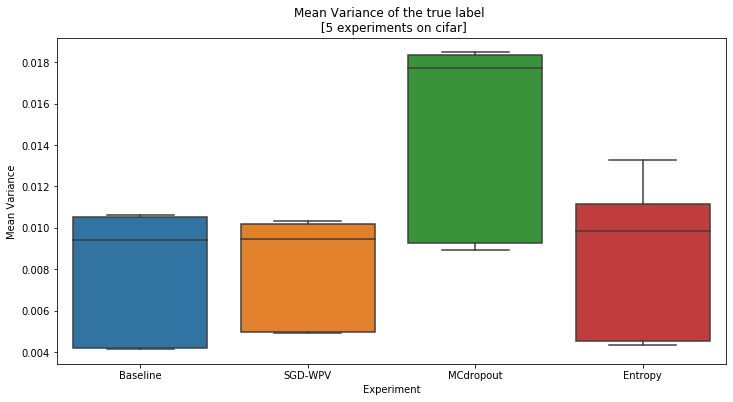

In [0]:
to_plot = pd.DataFrame(results)
to_plot.columns = ['Baseline','SGD-WPV', 'MCdropout','Entropy']
to_plot = to_plot.melt()
to_plot.columns = ['Experiment', 'Mean Variance']
plt.figure(figsize=(12, 6))
sns.boxplot(x="Experiment", y="Mean Variance", data=to_plot).set(title = "Mean Variance of the true label \n [5 experiments on cifar]")
plt.savefig(ROOT_PATH / 'Mean Variance of the true label.png')
plt.plot()